In [105]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [106]:
width = 256
height = 256
batch_size = 32
Channels = 3
Epoc = 50

In [107]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    "Plants",
    shuffle = True,
    image_size = (image_size, image_size),
    batch_size = batch_size
)

Found 2152 files belonging to 3 classes.


In [108]:
Class_name = data.class_names
Class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [109]:
len(data)

68

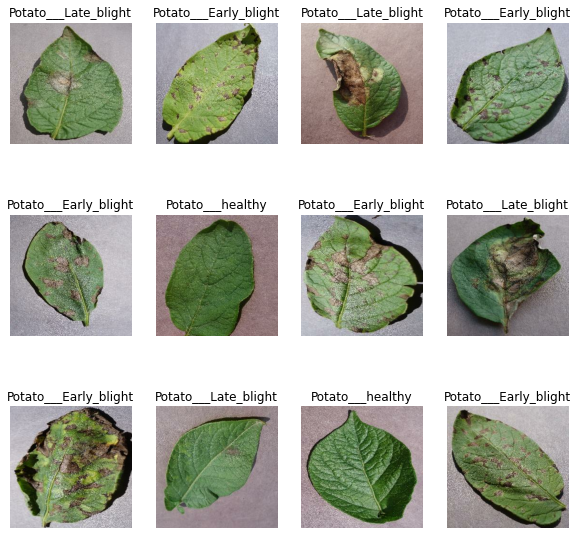

In [110]:
plt.figure(figsize = (10, 10))
for image_batch, label_batch in data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.title(Class_name[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

In [111]:
train_size = 0.8
validation_size = 0.1
test_size = 0.1

In [112]:
len(data)*train_size

54.400000000000006

In [113]:
len(data)*validation_size

6.800000000000001

In [114]:
len(data)*test_size

6.800000000000001

In [115]:
train_data = data.take(54)
len(train_data)

54

In [116]:
test_data = data.skip(54)
len(train_data)

54

In [117]:
validation_data = data.take(6)
len(validation_data)

6

In [118]:
test_data = test_data.skip(6)
len(test_data)

8

In [119]:
def get_dataset(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [120]:
train_ds, val_ds, test_ds = get_dataset(data)

In [121]:
len(train_ds)

54

In [122]:
len(val_ds)

6

In [123]:
len(test_ds)

8

In [124]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [125]:
data_resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size, image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [126]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [129]:
Input_shape = (batch_size, width, height, Channels)
no_of_classes = 3

model = models.Sequential([
    data_resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = Input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(no_of_classes, activation = 'softmax')
    
])
model.build(input_shape = Input_shape)

In [130]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_13 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_24 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [131]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [132]:
History = model.fit(
    train_ds,
    epochs = Epoc,
    batch_size = batch_size,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 165s 3s/step - loss: 0.9204 - accuracy: 0.4716 - val_loss: 0.8773 - val_accuracy: 0.4583
Epoch 2/50
54/54 [==============================] - 137s 3s/step - loss: 0.6755 - accuracy: 0.6916 - val_loss: 0.4757 - val_accuracy: 0.8333
Epoch 3/50
54/54 [==============================] - 84s 2s/step - loss: 0.4191 - accuracy: 0.8148 - val_loss: 0.4088 - val_accuracy: 0.8490
Epoch 4/50
54/54 [==============================] - 97s 2s/step - loss: 0.2836 - accuracy: 0.8964 - val_loss: 0.2923 - val_accuracy: 0.9010
Epoch 5/50
54/54 [==============================] - 90s 2s/step - loss: 0.2661 - accuracy: 0.8947 - val_loss: 0.2728 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 91s 2s/step - loss: 0.2650 - accuracy: 0.9039 - val_loss: 0.3678 - val_accuracy: 0.8438
Epoch 7/50
54/54 [==============================] - 91s 2s/step - loss: 0.1586 - accuracy: 0.9416 - val_loss: 0.4557 - val_accuracy: 0.8542
Epoch 8/50
54/54 [

In [133]:
score = model.evaluate(test_ds)

8/8 [==============================] - 8s 338ms/step - loss: 0.1302 - accuracy: 0.9609


In [134]:
score

[0.13016848266124725, 0.9609375]

In [135]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [136]:
acc = History.history['accuracy']
los = History.history['loss']
val_loss = History.history['val_loss']
val_acc = History.history['val_accuracy']

Text(0.5, 1.0, 'Trainig and Validation Accuracy')

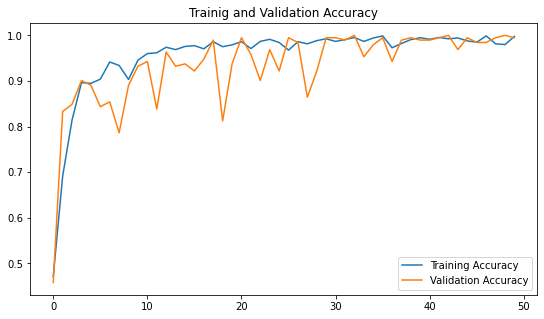

In [139]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)

plt.plot(range(Epoc), acc, label = "Training Accuracy")
plt.plot(range(Epoc), val_acc, label = "Validation Accuracy")

plt.legend(loc = 'lower right')
plt.title('Trainig and Validation Accuracy')

First Image Visualization
Original Label Potato___Early_blight
prediction Label Potato___Early_blight


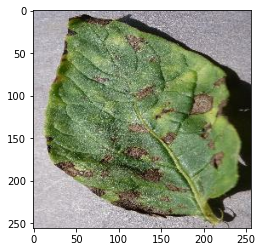

In [140]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    image_one = image_batch[0].numpy().astype('uint8')
    image_one_label = label_batch[0].numpy()
    
    print("First Image Visualization")
    plt.imshow(image_one)
    print("Original Label", Class_name[image_one_label])
    
    batch_predict = model.predict(image_batch)
    print("prediction Label", Class_name[np.argmax(batch_predict[0])])
    

In [141]:
def predict(mode, img):
    img_arr = tf.keras.preprocessing.image.img_to_array(images[1].numpy())
    img_arr = tf.expand_dims(img_arr, 0)
    
    prediction = mode.predict(img_arr)
    
    predict_class = Class_name[np.argmax(batch_predict[0])]
    confidence = round(100*(np.max(prediction[0])), 2)
    return predict_class, confidence

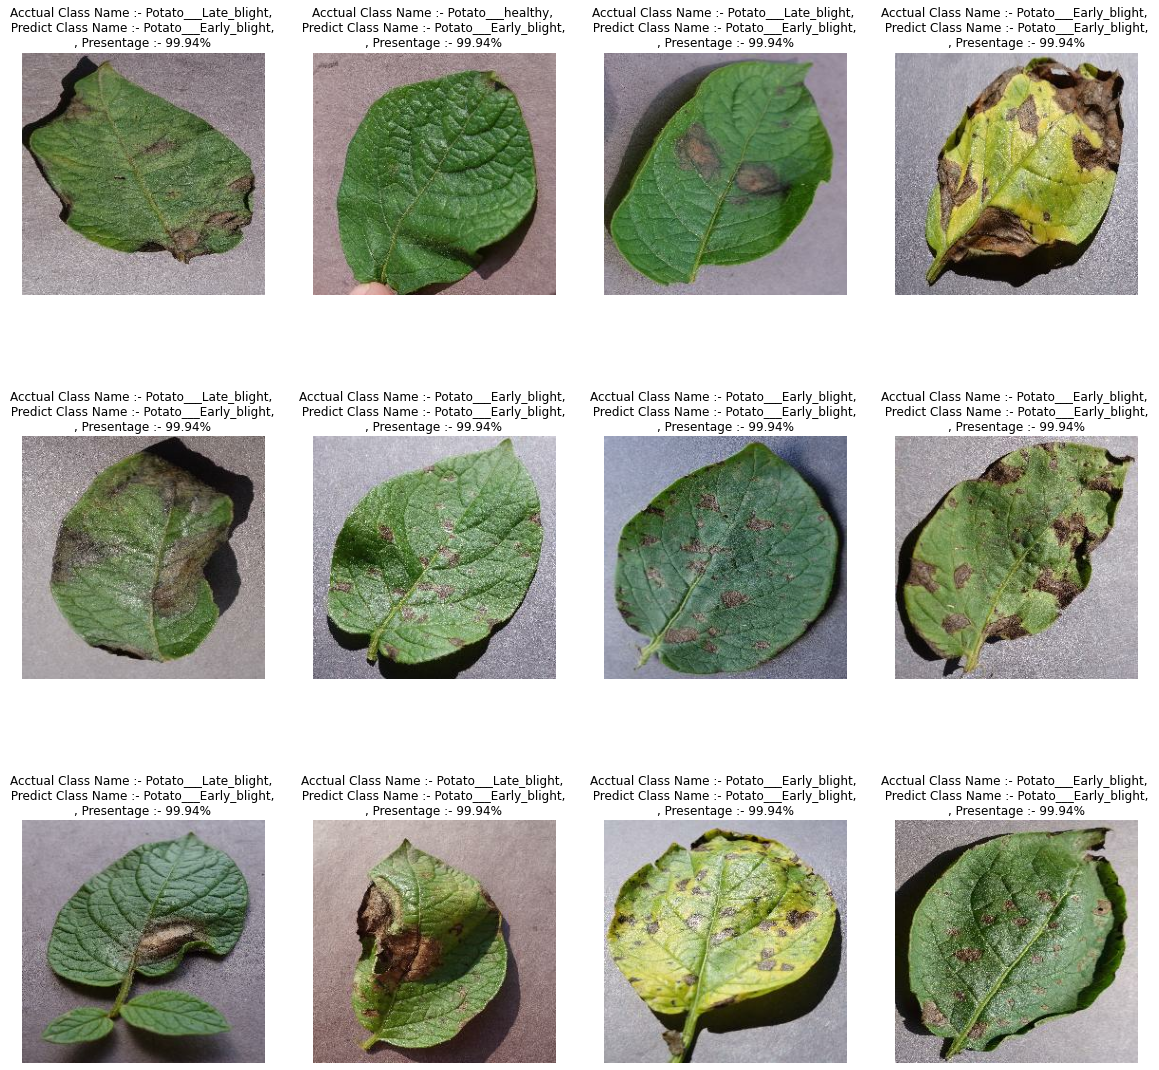

In [142]:
plt.figure(figsize = (20, 20))

for images, label in test_ds.take(1):
    for i in range(12):
        
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predict_class, confidence = predict(model, images[i].numpy())
        original_class = Class_name[label[i]]
        
        plt.title(f"Acctual Class Name :- {original_class}, \n Predict Class Name :- {predict_class}, \n, Presentage :- {confidence}%")
        plt.axis('off')
    